C:\Users\91893\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3921 - loss: 1.6584
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6060 - loss: 1.1299
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6630 - loss: 0.9712
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6969 - loss: 0.8689
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7291 - loss: 0.7816
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7457 - loss: 0.7296
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7615 - loss: 0.6837
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7789 - loss: 0.6315
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7960 - loss: 0.5870
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8061 - loss: 0.5549
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7055 - loss: 0.9270
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/s

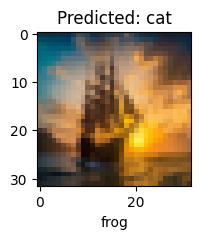

The model predicts this image as: cat


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO


(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 0)


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


cnn.fit(X_train, y_train, epochs=10)


cnn.evaluate(X_test, y_test)


def predict_new_image(image_path):
    
    img = Image.open(image_path).resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 32, 32, 3)
    
   
    predictions = cnn.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    
    
    plt.imshow(img)
    plt.title(f'Predicted: {classes[predicted_class]}')
    plt.show()
    
    return classes[predicted_class]

# Example usage
image_path = 'ship.jpg'  
predicted_class = predict_new_image(image_path)
print(f'The model predicts this image as: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


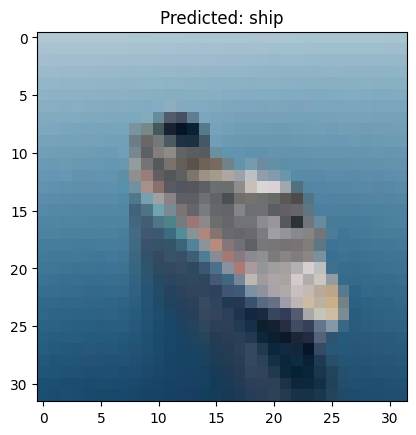

The model predicts this image as: ship


In [2]:
# Example usage
image_path = 'ship2.jpg' 
predicted_class = predict_new_image(image_path)
print(f'The model predicts this image as: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


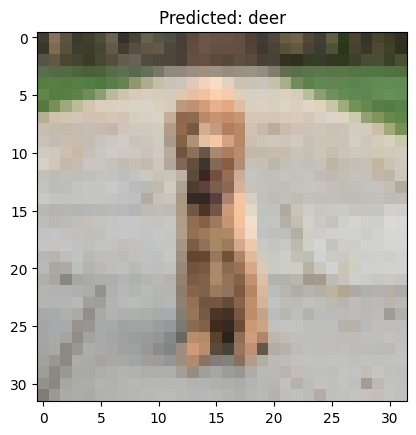

The model predicts this image as: deer


In [3]:
# Example usage
image_path = 'dog.jpg'  
predicted_class = predict_new_image(image_path)
print(f'The model predicts this image as: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


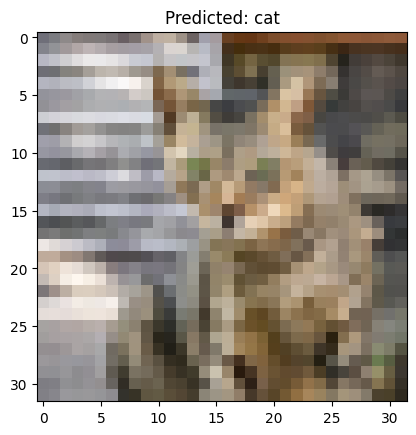

The model predicts this image as: cat


In [4]:
# Example usage
image_path = 'cat.jpg'  
predicted_class = predict_new_image(image_path)
print(f'The model predicts this image as: {predicted_class}')

In [5]:
pip install Flask tensorflow pillow



  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\flask.exe' -> 'c:\\Python311\\Scripts\\flask.exe.deleteme'


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
cnn.save('trained_cnn.h5')
